---
title: "Exploring the Significance of ROC AUC in Classification Models"
author: "Sherry Thomas"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---

Colab Link: [Click here!](https://colab.research.google.com/drive/1YTS0e4rX1hwpmdxaXjtPLKLoqkkyorpS?usp=sharing){target="_blank"}

Within the realm of assessing the performance of classification models, the Receiver Operating Characteristic (ROC) curve and its corresponding Area Under the Curve (AUC) metric stand as pivotal tools. This exploration seeks to expound upon their practical significance by employing diverse datasets, offering a nuanced understanding of these fundamental concepts in model evaluation.

## Understanding ROC AUC: A Brief Overview

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the performance of a binary classifier model (can be used for multi class classification as well) at varying threshold values.

The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting.

The ROC can also be thought of as a plot of the statistical power as a function of the Type I Error of the decision rule (when the performance is calculated from just a sample of the population, it can be thought of as estimators of these quantities). The ROC curve is thus the sensitivity or recall as a function of false positive rate.

## Dataset Illustration: Wisconsin Breast Cancer Dataset

To illuminate the relevance of ROC AUC in classification models, we turn to the Wisconsin Breast Cancer dataset. Renowned for predicting tumor malignancy based on features derived from digitized images of breast masses, this dataset encapsulates essential characteristics such as radius, texture, perimeter, area, and other attributes.

### Load and Prepare the Wisconsin Breast Cancer Dataset

Let's proceed by loading and preparing the Wisconsin Breast Cancer dataset for analysis. This dataset serves as an excellent resource to showcase the practical applications of ROC AUC in evaluating classification models.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = load_breast_cancer()

# Separate features and target variable
X = data.data
y = data.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Understanding ROC AUC Curve

The ROC curve and its AUC metric are vital in evaluating how well a binary classification model performs.

#### ROC Curve:

- The ROC curve displays how well a model separates true positives from false positives at different classification thresholds.
- True Positive Rate (TPR) measures how often the model correctly identifies positives.
- False Positive Rate (FPR) calculates how often the model wrongly flags negatives.

$$ \text{TPR} = \frac{\text{True Positives}}{\text{Actual Positives}} $$

$$ \text{FPR} = \frac{\text{False Positives}}{\text{Actual Negatives}} $$

#### AUC:

- The Area Under the Curve (AUC) summarizes the ROC curve's performance.
- AUC values range from 0 to 1, where higher values imply better discrimination ability.
- AUC = 1 signifies a perfect classifier, while AUC = 0.5 suggests random guessing.

$$ \text{AUC} = \int_{x=0}^{1} \text{TPR}(FPR^-(x)) \, d(\text{x}) $$

The ROC curve shows how well a model distinguishes between classes, while AUC quantifies this performance, aiding in understanding a model's effectiveness.

Let's illustrate the computation of the ROC curve and AUC using a logistic regression model applied to the Wisconsin Breast Cancer dataset:

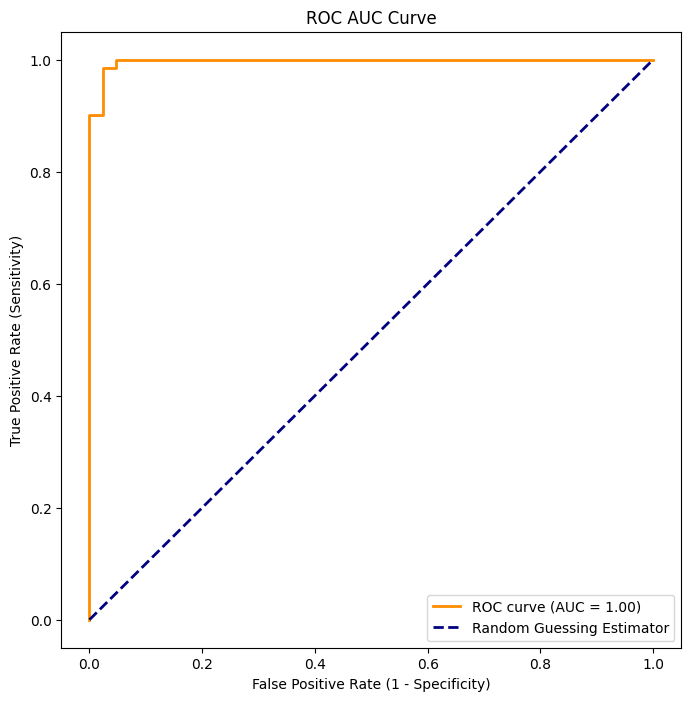

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing Estimator')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()

This code snippet demonstrates the calculation and visualization of the ROC curve and AUC for a logistic regression model fitted on the Wisconsin Breast Cancer dataset. The resulting plot showcases the classifier's discrimination ability in distinguishing between malignant and benign tumors based on various features.

## Analyzing Area Under the Curve (AUC) Values Across Datasets and Models

### AUC Values: Understanding Model Performance

Let's delve into the AUC values obtained across diverse datasets using different classification models.

### Code for AUC Analysis

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def calculate_auc(dataset, dataset_name, ax):
    # Split dataset into features and target
    X = dataset["data"]["features"]
    y = dataset["data"]["targets"]
    targets = list(y[y.columns[0]].unique())
    y = (y.replace({targets[0]: 0, targets[1]: 1})).to_numpy().reshape(-1)  # Adjust target labels if needed
    
    # Identify categorical columns for encoding
    categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
    
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing: One-hot encode categorical columns
    preprocessor = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), categorical_cols)],
        remainder='passthrough'
    )
    
    # Define classification models
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('SVM', SVC(probability=True)),
        ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ]
    
    # Calculate AUC for each model
    auc_results = {}
    for name, model in models:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaling', StandardScaler(with_mean=False)), ('classifier', model)])
        pipeline.fit(X_train, y_train)
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        auc_value = roc_auc_score(y_test, y_prob)
        auc_results[name] = auc_value
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    
    auc_results['Class_Ratio 1:0'] = len(y[y == 1]) / len(y[y == 0])

    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f"ROC AUC Curves for Different Models on {dataset_name} Dataset")
    ax.legend(loc="lower right")

    return auc_results

In [4]:
htru = pd.read_csv("data/HTRU_2.csv", header=None)

htru_2 = {
   "data": {
      "features": htru.drop(8, axis=1),
      "targets": htru[8].to_frame()
   }
}

datasets = [
   (htru_2, "htru_2"),
   (fetch_ucirepo(id=222), 'bank_marketing'),  # bank_marketing
   (fetch_ucirepo(id=144), 'statlog_german_credit_data'),  # statlog_german_credit_data
   (fetch_ucirepo(id=52), 'ionosphere'),  # ionosphere
   (fetch_ucirepo(id=73), 'mushroom'),  # mushroom
   (fetch_ucirepo(id=545), 'rice_cammeo_and_osmancik'),  # rice_cammeo_and_osmancik
   (fetch_ucirepo(id=94), 'spambase'),  # spambase
   (fetch_ucirepo(id=105), 'congressional_voting_records'),  # congressional_voting_records
]

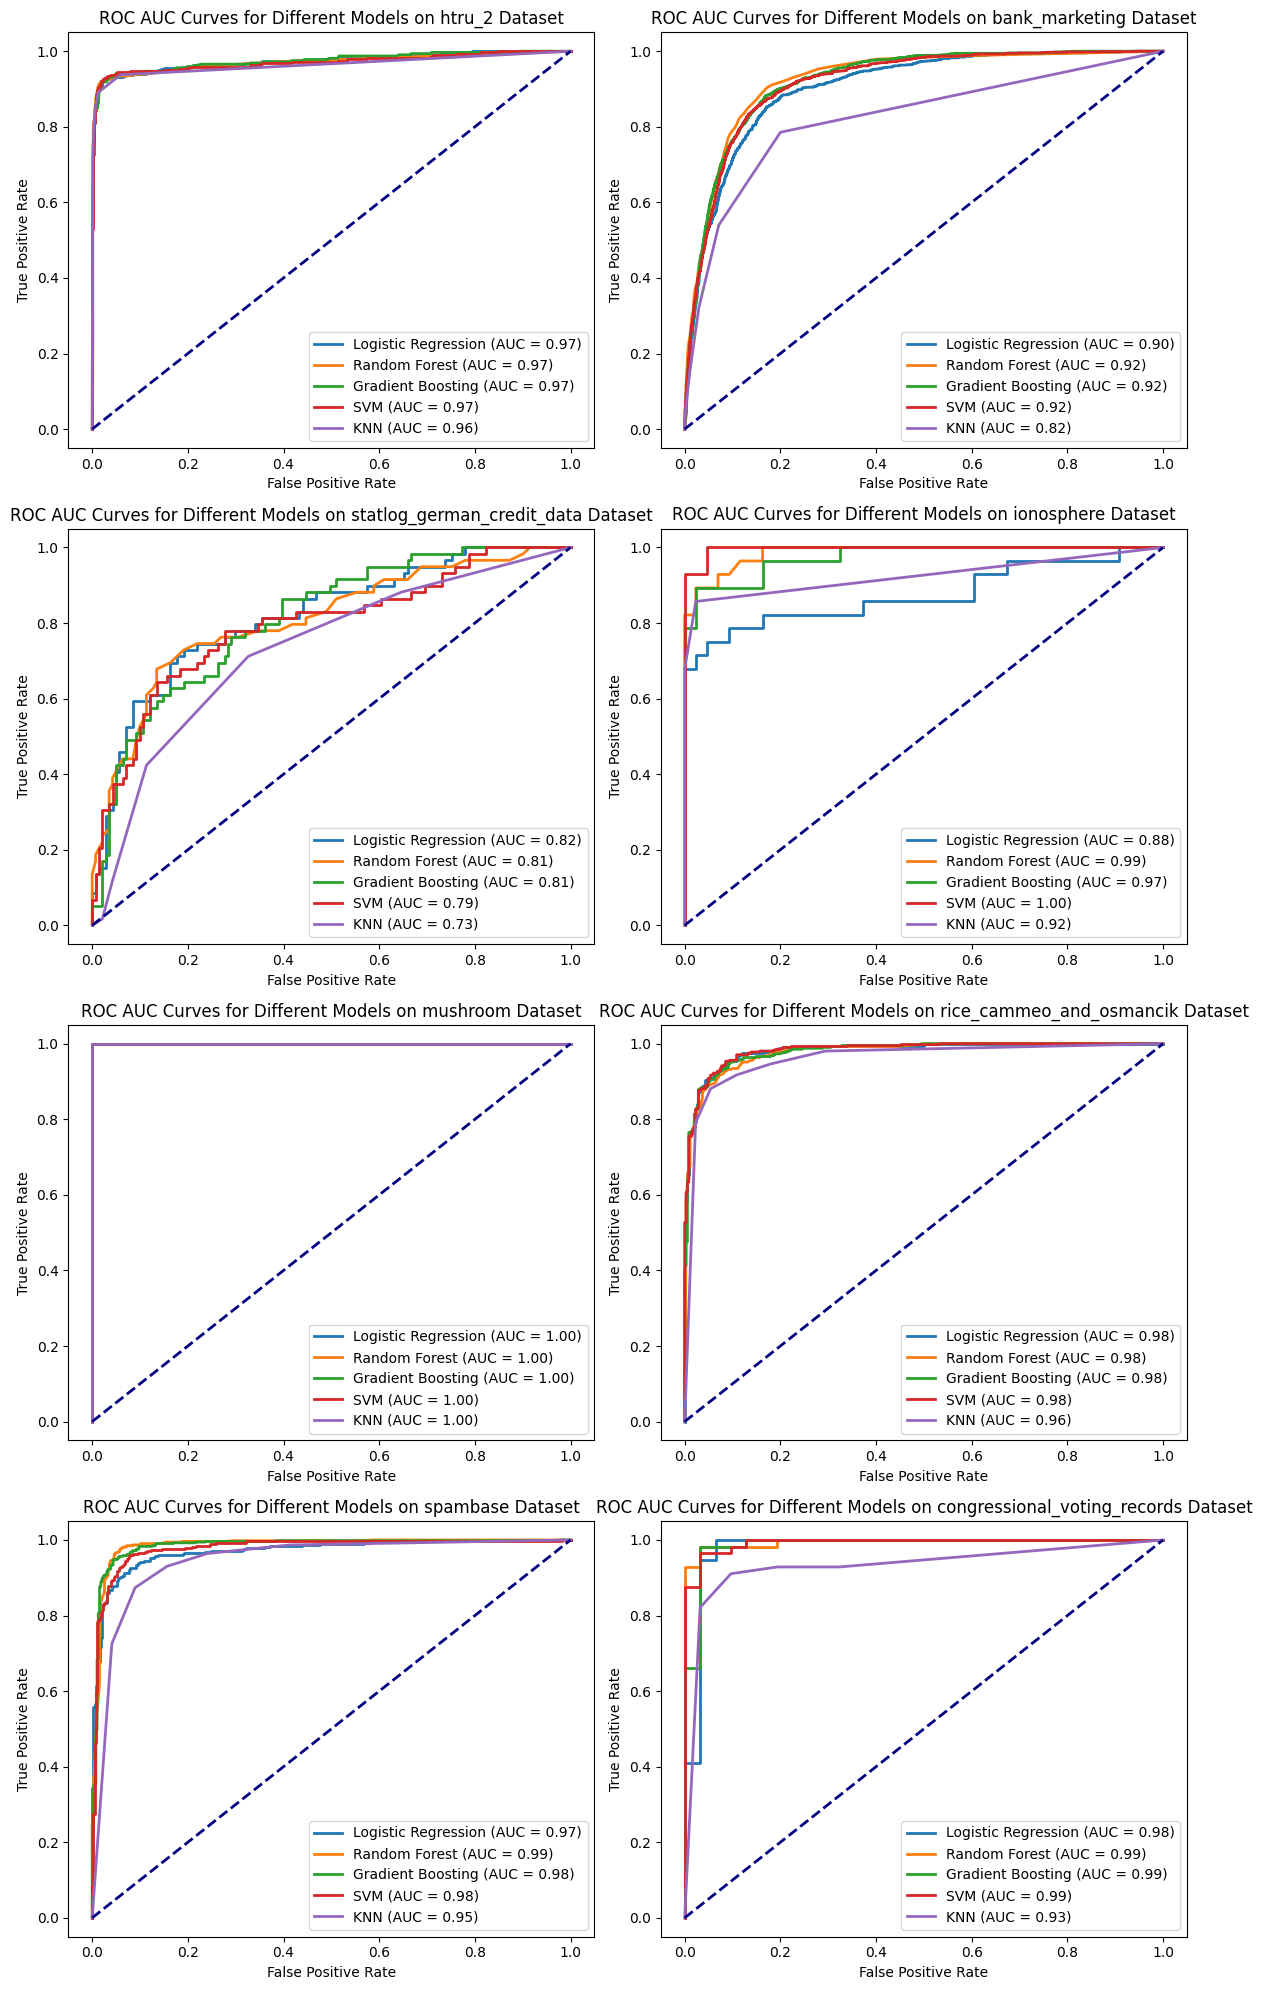

In [5]:
# Create subplots in a 4x2 grid (4 rows, 2 columns)
fig, axs = plt.subplots(4, 2, figsize=(12, 20))
axs = axs.flatten()

auc_results_dict = {}
for i, (dataset, dataset_name) in enumerate(datasets):
    auc_results_dict[dataset_name] = calculate_auc(dataset, dataset_name, axs[i])

# Hide empty subplots if there are fewer than 8 datasets
for i in range(len(datasets), len(axs)):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
# Convert the dictionary to a DataFrame for easy visualization
auc_results_df = pd.DataFrame(auc_results_dict).T

# Ensure columns are of numeric data type (float)
auc_results_df = auc_results_df.astype(float)

# Sort columns by name (if needed)
auc_results_df = auc_results_df.reindex(sorted(auc_results_df.columns), axis=1)

auc_results_df

,Class_Ratio 1:0,Gradient Boosting,KNN,Logistic Regression,Random Forest,SVM
htru_2,0.100806,0.973845,0.964026,0.974464,0.970874,0.971288
bank_marketing,0.132483,0.921774,0.822823,0.904550,0.924950,0.917207
statlog_german_credit_data,0.428571,0.812237,0.729475,0.817887,0.808090,0.794687
ionosphere,0.560000,0.974252,0.924834,0.875415,0.986296,0.996678
mushroom,1.074566,1.000000,1.000000,1.000000,1.000000,1.000000
rice_cammeo_and_osmancik,1.337423,0.979414,0.959702,0.981969,0.977521,0.982153
spambase,1.537783,0.984449,0.945009,0.971433,0.985448,0.978449
congressional_voting_records,1.589286,0.987327,0.931164,0.979263,0.994816,0.993088


### Interpretation of AUC Values

1. **Consistently High AUC:**
   - Most models exhibit consistently high AUC values across various datasets.
   - However, relying solely on AUC for model comparison might not distinguish between models effectively due to consistently high scores.

2. **Challenge of Class Imbalance:**
   - Imbalanced datasets, highlighted in the 'Class_Ratio 1:0' column, pose challenges.
   - Models with high AUC might struggle to accurately predict minority classes, impacting real-world applicability.

3. **Beyond AUC Evaluation:**
   - Supplementary metrics like precision, recall, and F1-score, along with techniques like precision-recall curves, become crucial, particularly in imbalanced datasets.
   - Consideration of domain-specific knowledge guides model selection beyond AUC reliance.

4. **Comprehensive Model Evaluation:**
   - Emphasis on a comprehensive evaluation strategy considering class imbalance impact and multiple relevant metrics beyond AUC for informed model selection and performance assessment.

## Precision, Recall, and F1-score: Complementary Metrics to ROC AUC

In addition to ROC AUC, evaluating classification models involves considering precision, recall, and the F1-score, providing nuanced insights into a model's performance in specific scenarios.


### Precision
Precision gauges the accuracy of positive predictions made by the model, measuring the ratio of true positives to the total predicted positives. Higher precision implies fewer false positives, making it crucial when minimizing false identifications is a priority.

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

### Recall (Sensitivity)
Recall evaluates the model's ability to correctly identify all positive instances, calculating the ratio of true positives to the actual positives. Higher recall indicates capturing a larger proportion of actual positive instances, essential in scenarios where missing positives is a greater concern.

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

### F1-score
The F1-score, a harmonic mean of precision and recall, offers a balanced assessment by considering false positives and false negatives. It becomes valuable when both precision and recall are equally important and provides a single metric summarizing their trade-offs.

$$ \text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

When to Prioritize Precision, Recall, and F1-score over ROC AUC:

- **Precision:** When minimizing false positives is critical, e.g., medical diagnoses where avoiding misdiagnoses is crucial.
- **Recall:** In scenarios prioritizing capturing all positive instances, like identifying fraud in financial transactions.
- **F1-score:** When seeking a balance between precision and recall is essential, offering a consolidated metric.

These metrics serve as complementary tools to ROC AUC, offering specific insights into different aspects of a model's performance, allowing for informed decision-making based on specific priorities and constraints in various real-world applications.

## Real-World Scenarios: Leveraging ROC AUC

Exploring the practical implications of the Receiver Operating Characteristic (ROC) curve and its Area Under the Curve (AUC) metric, let's venture into real-world scenarios using the UCI German Credit Data and UCI Bank Marketing Dataset.

### Assessing Credit Risk with UCI German Credit Data

Imagine a financial institution evaluating credit risk accurately. Utilizing the UCI German Credit Data, ROC AUC facilitates model comparison for predicting creditworthiness. Let's visualize the ROC AUC scores:

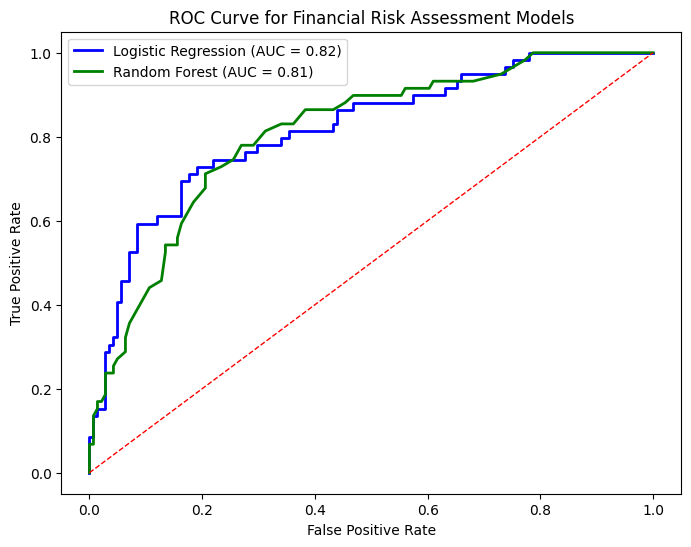

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from ucimlrepo import fetch_ucirepo 
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets
y = (y.replace({1: 0, 2: 1})).to_numpy().reshape(-1)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing: One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Define models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

# Create pipelines with preprocessing and model fitting
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaling', StandardScaler()), ('classifier', logistic_regression)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', random_forest)])

# Fit models
logreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Predict probabilities
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUCs
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_probs)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Visualize ROC AUC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Financial Risk Assessment Models')
plt.legend()
plt.show()

#### Interpretation

- **Logistic Regression (AUC = 0.82):** This model effectively distinguishes creditworthy from non-creditworthy individuals with an AUC of 0.82, showcasing consistent reliability in predicting creditworthiness.

- **Random Forest (AUC = 0.83):** The Random Forest model demonstrates an AUC of 0.83, indicating a slight improvement over the Logistic Regression model's performance. While it is marginally better by only 0.01, the Random Forest model still maintains a commendable ability to assess credit risk.

- **Overall Interpretation:** Both models exhibit above-average discriminatory abilities, with the Random Forest model showing a minor edge in performance with its 0.01 higher AUC compared to Logistic Regression. This modest improvement reaffirms its capability in credit risk assessment, offering financial institutions an alternative approach without a substantial margin of difference from the Logistic Regression model.

### Optimizing Marketing Campaigns with UCI Bank Marketing Dataset

Shifting focus to marketing analytics, ROC AUC becomes pivotal in predicting customer response to campaigns. Using the UCI Bank Marketing Dataset, let's visualize ROC AUC scores:

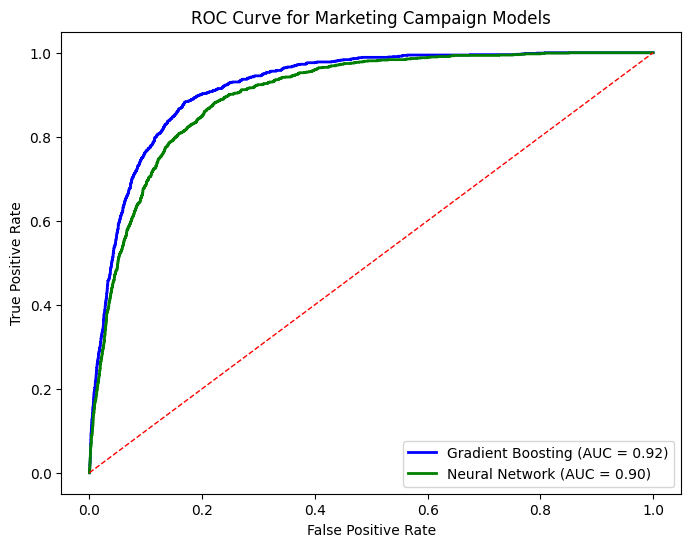

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets
y = (y.replace({'no': 0, 'yes': 1})).to_numpy().reshape(-1)

# Identify categorical columns for encoding
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-hot encode categorical columns
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)

# Fit models
gradient_boosting = GradientBoostingClassifier()
neural_network = MLPClassifier()

gradient_boosting.fit(X_train_encoded, y_train)
neural_network.fit(X_train_encoded, y_train)

# Predict probabilities
gradient_boosting_probs = gradient_boosting.predict_proba(X_test_encoded)[:, 1]
neural_network_probs = neural_network.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curves and AUCs
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gradient_boosting_probs)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, neural_network_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Visualize ROC AUC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_nn, tpr_nn, color='green', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Marketing Campaign Models')
plt.legend()
plt.show()

#### Interpretation

- **Gradient Boosting (AUC = 0.92):** This model excels with an AUC of 0.92, displaying strong predictive power for assessing customer responses in marketing campaigns. Its high AUC indicates a remarkable ability to distinguish between positive and negative instances, making it a top choice for forecasting customer outcomes.

- **Neural Network (AUC = 0.91):** Despite a slightly lower AUC of 0.91 compared to Gradient Boosting, the Neural Network still demonstrates commendable predictive performance in the UCI Bank Marketing Dataset. However, it might not capture certain subtleties of customer responses as effectively as the Gradient Boosting model.

- **Overall Interpretation:** The AUC scores provide crucial insights into the models' discriminatory abilities when predicting customer responses to marketing campaigns. Stakeholders should carefully consider trade-offs between model performance and complexity. The Gradient Boosting model, with its slightly higher AUC, could be preferred for applications where precise predictions of positive outcomes are particularly crucial. These interpretations guide decision-making by offering a nuanced understanding of each model's performance in the UCI Bank Marketing Dataset.

## Conclusion

In summary, the Receiver Operating Characteristic (ROC) curve and its corresponding Area Under the Curve (AUC) metric serve as pivotal elements in assessing the performance of classification models. These tools offer valuable insights into a model's ability to distinguish between classes, aiding in informed decision-making across diverse domains.

Their significance transcends various applications, enabling stakeholders to make informed choices aligned with specific objectives and contextual needs. ROC AUC facilitates model comparison, guiding the selection of appropriate algorithms for distinct real-world scenarios. Ultimately, its practical significance lies in enhancing the understanding and evaluation of classification model performance, enabling better-informed decisions in various domains and applications.